In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import os

In [2]:
atlantic_hurricanes = pd.read_csv("Data/atlantic_hurricanes.csv")
pacific_hurricanes = pd.read_csv("Data/pacific_hurricanes.csv")

In [3]:
# Stack the DataFrames on top of each other
hurricanes_combined = pd.concat([atlantic_hurricanes, pacific_hurricanes], axis=0)
hurricanes_combined.tail(30)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
26107,EP212015,RICK,20151125,600,,LO,21.4N,124.2W,20,1009,...,0,0,0,0,0,0,0,0,0,0
26108,EP212015,RICK,20151125,1200,,LO,21.3N,124.6W,20,1009,...,0,0,0,0,0,0,0,0,0,0
26109,EP212015,RICK,20151125,1800,,LO,21.0N,125.0W,20,1009,...,0,0,0,0,0,0,0,0,0,0
26110,EP212015,RICK,20151126,0,,LO,20.6N,125.4W,20,1009,...,0,0,0,0,0,0,0,0,0,0
26111,EP212015,RICK,20151126,600,,LO,20.2N,126.0W,20,1009,...,0,0,0,0,0,0,0,0,0,0
26112,EP222015,SANDRA,20151123,1200,,LO,10.9N,100.5W,25,1006,...,0,0,0,0,0,0,0,0,0,0
26113,EP222015,SANDRA,20151123,1800,,TD,10.8N,102.0W,30,1005,...,0,0,0,0,0,0,0,0,0,0
26114,EP222015,SANDRA,20151124,0,,TS,10.8N,103.3W,35,1004,...,0,60,0,0,0,0,0,0,0,0
26115,EP222015,SANDRA,20151124,600,,TS,10.9N,104.4W,40,1002,...,0,60,0,0,0,0,0,0,0,0
26116,EP222015,SANDRA,20151124,1200,,TS,11.2N,105.5W,45,1000,...,0,60,0,0,0,0,0,0,0,0


In [4]:
#format date
# https://datatofish.com/integers-datetime-pandas-dataframe/
hurricanes_combined['Date'] = pd.to_datetime(hurricanes_combined['Date'], format='%Y%m%d')

In [5]:
#extract year and add as a column
hurricanes_combined['Year'] = hurricanes_combined['Date'].dt.year
hurricanes_combined

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year
0,AL011851,UNNAMED,1851-06-25,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
1,AL011851,UNNAMED,1851-06-25,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
2,AL011851,UNNAMED,1851-06-25,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
3,AL011851,UNNAMED,1851-06-25,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
4,AL011851,UNNAMED,1851-06-25,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,2015
26133,EP222015,SANDRA,2015-11-28,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,2015
26134,EP222015,SANDRA,2015-11-29,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,2015
26135,EP222015,SANDRA,2015-11-29,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,2015


In [6]:
hurricanes_combined = hurricanes_combined[['Status', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW', 'Year']]

hurricanes_combined

,Status,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year
0,HU,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
1,HU,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
2,HU,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
3,HU,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
4,HU,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,LO,35,1002,60,0,0,0,0,0,0,0,0,0,0,0,2015
26133,LO,30,1007,0,0,0,0,0,0,0,0,0,0,0,0,2015
26134,LO,30,1008,0,0,0,0,0,0,0,0,0,0,0,0,2015
26135,LO,25,1009,0,0,0,0,0,0,0,0,0,0,0,0,2015


In [7]:
hurricanes_combined_date_reduce = hurricanes_combined.loc[hurricanes_combined["Minimum Pressure"] != -999,:]
hurricanes_combined_date_reduce

,Status,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year
127,HU,100,961,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1852
252,HU,130,924,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1853
346,HU,110,938,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854
351,HU,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854
352,HU,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,LO,35,1002,60,0,0,0,0,0,0,0,0,0,0,0,2015
26133,LO,30,1007,0,0,0,0,0,0,0,0,0,0,0,0,2015
26134,LO,30,1008,0,0,0,0,0,0,0,0,0,0,0,0,2015
26135,LO,25,1009,0,0,0,0,0,0,0,0,0,0,0,0,2015


In [8]:

X = hurricanes_combined_date_reduce[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']]
X.head(20)

,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
127,100,961,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
252,130,924,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
346,110,938,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
351,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
352,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
412,50,997,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
434,130,934,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
475,90,969,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
554,90,961,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
641,70,979,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [9]:
y = hurricanes_combined_date_reduce["Status"]
y.head()

127     HU
252     HU
346     HU
351     HU
352     HU
Name: Status, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
 from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [12]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.844/0.832
k: 3, Train/Test Score: 0.859/0.848
k: 5, Train/Test Score: 0.874/0.864
k: 7, Train/Test Score: 0.892/0.883
k: 9, Train/Test Score: 0.890/0.884
k: 11, Train/Test Score: 0.889/0.882
k: 13, Train/Test Score: 0.888/0.880
k: 15, Train/Test Score: 0.888/0.880
k: 17, Train/Test Score: 0.887/0.878
k: 19, Train/Test Score: 0.886/0.878


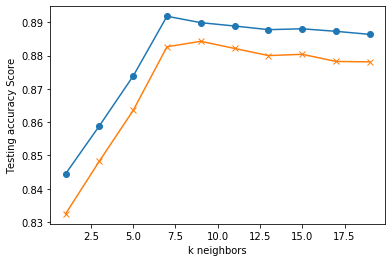

In [13]:
 # Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.880


In [15]:
new_hurricane_data = [[25, 1000,0,0,0,0,0,0,0,0,0,0,0,0]]

predicted_class = knn.predict(new_hurricane_data)
print(predicted_class)

[' LO']


In [16]:
hurricanes_only_combined_date_reduce =hurricanes_combined_date_reduce.loc[hurricanes_combined_date_reduce["Status"] == ' HU',:]
hurricanes_only_combined_date_reduce

,Status,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year
127,HU,100,961,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1852
252,HU,130,924,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1853
346,HU,110,938,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854
351,HU,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854
352,HU,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,HU,115,947,140,130,60,90,60,40,30,40,30,25,15,25,2015
26126,HU,110,951,140,130,60,90,60,40,30,40,30,25,15,25,2015
26127,HU,95,963,140,120,60,90,60,40,30,30,30,25,15,20,2015
26128,HU,85,970,140,120,50,70,60,40,30,30,30,25,15,20,2015


In [17]:
# X_hurr = hurricanes_only_combined_date_reduce[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
#        'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
#        'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
#        'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']]
X_hurr = hurricanes_only_combined_date_reduce[['Maximum Wind', 'Minimum Pressure']]
X_hurr

,Maximum Wind,Minimum Pressure
127,100,961
252,130,924
346,110,938
351,100,950
352,100,950
...,...,...
26125,115,947
26126,110,951
26127,95,963
26128,85,970


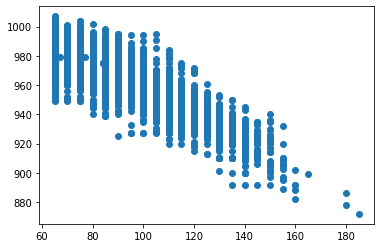

In [18]:
# Plot and show scatter
plt.scatter(X_hurr['Maximum Wind'], X_hurr['Minimum Pressure'])
plt.show()

In [19]:
 # Create a kmeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(X_hurr)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X_hurr)
predicted_clusters

array([1, 3, 1, ..., 0, 0, 2])

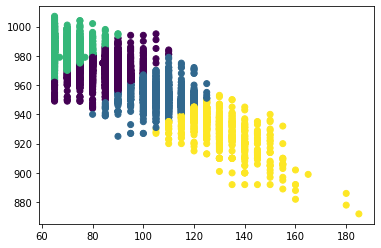

In [20]:
# Plot the clusters
plt.scatter(X_hurr['Maximum Wind'], X_hurr['Minimum Pressure'], c=predicted_clusters)
plt.show()

In [21]:
hurricanes_only_combined_date_reduce["Magnitude"] = predicted_clusters
hurricanes_only_combined_date_reduce

C:\Users\Amber\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Status,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Magnitude
127,HU,100,961,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1852,1
252,HU,130,924,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1853,3
346,HU,110,938,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854,1
351,HU,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854,1
352,HU,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,HU,115,947,140,130,60,90,60,40,30,40,30,25,15,25,2015,1
26126,HU,110,951,140,130,60,90,60,40,30,40,30,25,15,25,2015,1
26127,HU,95,963,140,120,60,90,60,40,30,30,30,25,15,20,2015,0
26128,HU,85,970,140,120,50,70,60,40,30,30,30,25,15,20,2015,0


In [22]:
 # Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [23]:
centers

array([[ 85.8385377 , 970.78484387],
       [106.05941704, 953.79428251],
       [ 69.51852916, 985.07095662],
       [128.0418251 , 931.4904943 ]])

In [24]:
global_warming_parameters = pd.read_csv("Data/All_parameters.csv")
global_warming_parameters

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GCAG_TEMP,GIS_TEMP,Sea_anomaly_temp,GMSL,CO2_Increase,CSIRO Adjusted Sea Level,Glacier_mass
0,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.20,-0.470009,-158.7,NaN,0.000000,NaN
1,1881,0.0,4.0,239.0,0.0,0.0,1.374792e+09,-0.0628,-0.12,-0.356879,-153.1,NaN,0.220472,NaN
2,1882,0.0,4.0,252.0,0.0,0.0,1.384401e+09,-0.0648,-0.10,-0.372661,-169.9,NaN,-0.440945,NaN
3,1883,0.0,3.0,269.0,0.0,0.0,1.394147e+09,-0.1424,-0.21,-0.448443,-164.6,NaN,-0.232283,NaN
4,1884,0.0,4.0,271.0,0.0,0.0,1.403721e+09,-0.2009,-0.28,-0.589754,-143.7,NaN,0.590551,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2013,NaN,NaN,NaN,NaN,NaN,NaN,0.6679,0.65,0.584674,67.7,2.41,8.980315,-27.817
134,2014,NaN,NaN,NaN,NaN,NaN,NaN,0.7408,0.74,0.751255,NaN,2.04,NaN,-28.652
135,2015,NaN,NaN,NaN,NaN,NaN,NaN,0.8998,0.87,0.935577,NaN,2.94,NaN,NaN
136,2016,NaN,NaN,NaN,NaN,NaN,NaN,0.9363,0.99,NaN,NaN,2.86,NaN,NaN


In [25]:
hurricane_gw_df = pd.merge(global_warming_parameters, hurricanes_only_combined_date_reduce, on = "Year", how = "inner")
hurricane_gw_df

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GCAG_TEMP,GIS_TEMP,Sea_anomaly_temp,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Magnitude
0,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.20,-0.470009,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,3
1,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.20,-0.470009,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,3
2,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.20,-0.470009,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1
3,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.20,-0.470009,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,2
4,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.20,-0.470009,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8616,2015,NaN,NaN,NaN,NaN,NaN,NaN,0.8998,0.87,0.935577,...,90,60,40,30,40,30,25,15,25,1
8617,2015,NaN,NaN,NaN,NaN,NaN,NaN,0.8998,0.87,0.935577,...,90,60,40,30,40,30,25,15,25,1
8618,2015,NaN,NaN,NaN,NaN,NaN,NaN,0.8998,0.87,0.935577,...,90,60,40,30,30,30,25,15,20,0
8619,2015,NaN,NaN,NaN,NaN,NaN,NaN,0.8998,0.87,0.935577,...,70,60,40,30,30,30,25,15,20,0


In [26]:
hurricane_gw_df["Count"]=1
hurricane_gw_df.head()

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GCAG_TEMP,GIS_TEMP,Sea_anomaly_temp,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Magnitude,Count
0,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.2,-0.470009,...,-999,-999,-999,-999,-999,-999,-999,-999,3,1
1,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.2,-0.470009,...,-999,-999,-999,-999,-999,-999,-999,-999,3,1
2,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.2,-0.470009,...,-999,-999,-999,-999,-999,-999,-999,-999,1,1
3,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.2,-0.470009,...,-999,-999,-999,-999,-999,-999,-999,-999,2,1
4,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.2,-0.470009,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1


In [27]:
years = hurricane_gw_df["Year"].unique()
Mag_0 = []
Mag_1 = []
Mag_2 = []
Mag_3 = []


hurricane_total = []

for year in years:
    total = hurricane_gw_df.loc[(hurricane_gw_df["Year"] == year),:]
    hurricane_total.append(total.shape[0])
    sum_0 = hurricane_gw_df.loc[(hurricane_gw_df["Magnitude"] == 0) & 
                                    (hurricane_gw_df["Year"] == year),:]
    Mag_0.append(sum_0.shape[0])
    sum_1 = hurricane_gw_df.loc[(hurricane_gw_df["Magnitude"] == 1) & 
                                    (hurricane_gw_df["Year"] == year),:]
    Mag_1.append(sum_1.shape[0])
    sum_2 = hurricane_gw_df.loc[(hurricane_gw_df["Magnitude"] == 2) & 
                                    (hurricane_gw_df["Year"] == year),:]
    Mag_2.append(sum_2.shape[0])
    sum_3 = hurricane_gw_df.loc[(hurricane_gw_df["Magnitude"] == 3) & 
                                    (hurricane_gw_df["Year"] == year),:]
    Mag_3.append(sum_3.shape[0])


In [29]:
#zip together above lists
hurricane_data = list(zip(years, Mag_0, Mag_1,Mag_2,Mag_3,hurricane_total))
#make a dataframe from zipped lists and rename columns
hurricane_data = pd.DataFrame(hurricane_data)
hurricane_data = hurricane_data.rename(columns = {0:"Year", 1:"Magnitude_0", 2:"Magnitude_1", 3:"Magnitude_2", 4: "Magnitude_3",5:"Hurricane_total"})
# atlantic_ocean_data = atlantic_ocean_data[:62]
# tornado_data = atlantic_ocean_data[29:160]
hurricane_data

,Year,Magnitude_0,Magnitude_1,Magnitude_2,Magnitude_3,Hurricane_total
0,1880,4,1,4,4,13
1,1881,3,0,0,0,3
2,1882,0,3,1,0,4
3,1883,0,0,1,0,1
4,1884,1,1,3,0,5
...,...,...,...,...,...,...
121,2011,71,63,71,11,216
122,2012,88,21,100,1,210
123,2013,14,3,56,0,73
124,2014,78,50,115,22,265


In [30]:
gw_data_hurricane = pd.merge(global_warming_parameters, hurricane_data, on = "Year", how = "inner")
# gw_data_tornado_condensed = gw_data_tornado[9:60]
gw_data_hurricane.columns

Index(['Year', 'Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement',
       'Gas Flaring', 'population', 'GCAG_TEMP', 'GIS_TEMP',
       'Sea_anomaly_temp', 'GMSL', 'CO2_Increase', 'CSIRO Adjusted Sea Level',
       'Glacier_mass', 'Magnitude_0', 'Magnitude_1', 'Magnitude_2',
       'Magnitude_3', 'Hurricane_total'],
      dtype='object')

In [31]:
gw_data_hurricane_test = gw_data_hurricane[:121]
gw_data_hurricane_test

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GCAG_TEMP,GIS_TEMP,Sea_anomaly_temp,GMSL,CO2_Increase,CSIRO Adjusted Sea Level,Glacier_mass,Magnitude_0,Magnitude_1,Magnitude_2,Magnitude_3,Hurricane_total
0,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.20,-0.470009,-158.7,NaN,0.000000,NaN,4,1,4,4,13
1,1881,0.0,4.0,239.0,0.0,0.0,1.374792e+09,-0.0628,-0.12,-0.356879,-153.1,NaN,0.220472,NaN,3,0,0,0,3
2,1882,0.0,4.0,252.0,0.0,0.0,1.384401e+09,-0.0648,-0.10,-0.372661,-169.9,NaN,-0.440945,NaN,0,3,1,0,4
3,1883,0.0,3.0,269.0,0.0,0.0,1.394147e+09,-0.1424,-0.21,-0.448443,-164.6,NaN,-0.232283,NaN,0,0,1,0,1
4,1884,0.0,4.0,271.0,0.0,0.0,1.403721e+09,-0.2009,-0.28,-0.589754,-143.7,NaN,0.590551,NaN,1,1,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2006,1525.0,3089.0,3339.0,356.0,61.0,1.987055e+10,0.6125,0.63,0.511456,41.6,1.75,7.917323,-22.595,77,49,86,45,257
117,2007,1572.0,3081.0,3464.0,382.0,68.0,2.011784e+10,0.6100,0.66,0.384604,43.5,2.09,7.996063,-23.255,19,16,33,22,90
118,2008,1631.0,3122.0,3571.0,388.0,71.0,2.036727e+10,0.5419,0.54,0.367312,52.2,1.79,8.350394,-23.776,55,52,98,6,211
119,2009,1585.0,3056.0,3620.0,413.0,66.0,2.061831e+10,0.6367,0.64,0.589442,58.0,1.61,8.586614,-24.459,44,34,47,19,144


In [32]:
#hurricane analysis
X=gw_data_hurricane_test[['Gas Fuel',  'Liquid Fuel',
      'GIS_TEMP',
       'Sea_anomaly_temp',  'CSIRO Adjusted Sea Level',
       ]]
y=gw_data_hurricane_test.Hurricane_total

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [35]:
#modeling total hurricanes
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.696660277121953
Testing Score: 0.8037395517983575


In [36]:
#hurricane analysis part 2 - magnitudes
X_mag_0=gw_data_hurricane_test[[ 'Gas Fuel', 
       'GIS_TEMP',
       'Sea_anomaly_temp', 'CSIRO Adjusted Sea Level']]
y_mag_0=gw_data_hurricane_test.Magnitude_0

In [37]:
X_train_mag_0, X_test_mag_0, y_train_mag_0, y_test_mag_0 = train_test_split(X_mag_0, y_mag_0, random_state=22)

In [38]:
model_mag_0 = LinearRegression()

In [39]:
#modeling hurricanes mag_0
model_mag_0.fit(X_train_mag_0, y_train_mag_0)
training_score_mag_0 = model_mag_0.score(X_train_mag_0, y_train_mag_0)
testing_score_mag_0 = model_mag_0.score(X_test_mag_0, y_test_mag_0)

print(f"Training Score: {training_score_mag_0}")
print(f"Testing Score: {testing_score_mag_0}")

Training Score: 0.671467081433605
Testing Score: 0.6131333659837291


In [94]:
#hurricane analysis part 2 - magnitudes
X_mag_1=gw_data_hurricane_test[['Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement',
       'GIS_TEMP',
       'Sea_anomaly_temp', 'CSIRO Adjusted Sea Level',
       ]]
y_mag_1=gw_data_hurricane_test.Magnitude_1

In [95]:
X_train_mag_1, X_test_mag_1, y_train_mag_1, y_test_mag_1 = train_test_split(X_mag_1, y_mag_1, random_state=33)

In [96]:
model_mag_1 = LinearRegression()

In [97]:
#modeling hurricanes mag_1
model_mag_1.fit(X_train_mag_1, y_train_mag_1)
training_score_mag_1 = model_mag_1.score(X_train_mag_1, y_train_mag_1)
testing_score_mag_1 = model_mag_1.score(X_test_mag_1, y_test_mag_1)

print(f"Training Score: {training_score_mag_1}")
print(f"Testing Score: {testing_score_mag_1}")

Training Score: 0.7286155294827481
Testing Score: 0.6229414088611955


In [160]:
#hurricane analysis part 2 - magnitudes
X_mag_2=gw_data_hurricane_test[['Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement',
       'GIS_TEMP',
       'Sea_anomaly_temp', 'CSIRO Adjusted Sea Level'
       ]]
y_mag_2=gw_data_hurricane_test.Magnitude_2

In [161]:
X_train_mag_2, X_test_mag_2, y_train_mag_2, y_test_mag_2 = train_test_split(X_mag_2, y_mag_2, random_state=42)

In [162]:
model_mag_2 = LinearRegression()

In [163]:
#modeling hurricanes mag_1
model_mag_2.fit(X_train_mag_2, y_train_mag_2)
training_score_mag_2 = model_mag_2.score(X_train_mag_2, y_train_mag_2)
testing_score_mag_2 = model_mag_2.score(X_test_mag_2, y_test_mag_2)

print(f"Training Score: {training_score_mag_2}")
print(f"Testing Score: {testing_score_mag_2}")

Training Score: 0.7490824805363371
Testing Score: 0.7638322065408707


In [228]:
#hurricane analysis part 2 - magnitudes
X_mag_3=gw_data_hurricane_test[['Gas Fuel', 
      'GIS_TEMP','Sea_anomaly_temp',  'CSIRO Adjusted Sea Level'
        ]]
y_mag_3=gw_data_hurricane_test.Magnitude_3

In [229]:
X_train_mag_3, X_test_mag_3, y_train_mag_3, y_test_mag_3 = train_test_split(X_mag_3, y_mag_3, random_state=42)

In [230]:
model_mag_3 = LinearRegression()

In [231]:
#modeling hurricanes mag_1
model_mag_3.fit(X_train_mag_3, y_train_mag_3)
training_score_mag_3 = model_mag_3.score(X_train_mag_3, y_train_mag_3)
testing_score_mag_3 = model_mag_3.score(X_test_mag_3, y_test_mag_3)

print(f"Training Score: {training_score_mag_3}")
print(f"Testing Score: {testing_score_mag_3}")

Training Score: 0.5877577924757005
Testing Score: 0.5363815276006954
